In [40]:
# Importing all needed libraries
import pandas as pd
import io
import re

In [41]:
df = pd.read_csv('/home/pi/mb/internal_all.csv')

In [42]:
df.head

<bound method NDFrame.head of                                                Address
0                    https://www.acorn-printing.co.uk/
1    https://www.acorn-printing.co.uk/image/banners...
2    https://www.acorn-printing.co.uk/js/fileupload...
3    https://www.acorn-printing.co.uk/image/cache/d...
4    https://www.acorn-printing.co.uk/image/yourord...
..                                                 ...
485  https://www.acorn-printing.co.uk/image/cache/d...
486  https://www.acorn-printing.co.uk/image/cache/d...
487  https://www.acorn-printing.co.uk/image/cache/d...
488  https://www.acorn-printing.co.uk/image/cache/d...
489  https://www.acorn-printing.co.uk/image/cache/d...

[490 rows x 1 columns]>

In [43]:
# displaying the DataFrame
display(df)

,Address
0,https://www.acorn-printing.co.uk/
1,https://www.acorn-printing.co.uk/image/banners...
2,https://www.acorn-printing.co.uk/js/fileupload...
3,https://www.acorn-printing.co.uk/image/cache/d...
4,https://www.acorn-printing.co.uk/image/yourord...
...,...
485,https://www.acorn-printing.co.uk/image/cache/d...
486,https://www.acorn-printing.co.uk/image/cache/d...
487,https://www.acorn-printing.co.uk/image/cache/d...
488,https://www.acorn-printing.co.uk/image/cache/d...


In [44]:
# Define your own custom regex segments

segment_definitions = [
    [(r'\/news\/'), 'News'],
    [(r'\/image\/'), 'Image'],
    ]

use_segment_definitions = True

def get_segment(Address):
    
    if use_segment_definitions == True:
        for segment_definition in segment_definitions:
            if re.findall(segment_definition[0], Address):
                return segment_definition[1]
        return 'Other'

# Add a segment column, and assign each URL a segment   
df['segment'] = df['Address'].apply(lambda x: get_segment(x))

In [45]:
df.head(10)

,Address,segment
0,https://www.acorn-printing.co.uk/,Other
1,https://www.acorn-printing.co.uk/image/banners...,Other
2,https://www.acorn-printing.co.uk/js/fileupload...,Other
3,https://www.acorn-printing.co.uk/image/cache/d...,Other
4,https://www.acorn-printing.co.uk/image/yourord...,Other
5,https://www.acorn-printing.co.uk/embroidery,Other
6,"https://www.acorn-printing.co.uk/href=""https:/...",Other
7,https://www.acorn-printing.co.uk/news/a-comple...,News
8,https://www.acorn-printing.co.uk/image/acornlo...,Other
9,https://www.acorn-printing.co.uk/testimonials,Other


In [46]:
# Function to create a segment from a URL
def get_segment(Address):
  
        slug = re.search(r'https?:\/\/.*?\//?([^\/]*)\/', Address)
        if slug:
            return slug.group(1)
        else:
            return 'None'

# Add a segment column, and assign each URL a segment   
df['segment'] = df['Address'].apply(lambda x: get_segment(x))

In [47]:
df.head(30)

,Address,segment
0,https://www.acorn-printing.co.uk/,None
1,https://www.acorn-printing.co.uk/image/banners...,image
2,https://www.acorn-printing.co.uk/js/fileupload...,js
3,https://www.acorn-printing.co.uk/image/cache/d...,image
4,https://www.acorn-printing.co.uk/image/yourord...,image
5,https://www.acorn-printing.co.uk/embroidery,None
6,"https://www.acorn-printing.co.uk/href=""https:/...","href=""https:"
7,https://www.acorn-printing.co.uk/news/a-comple...,news
8,https://www.acorn-printing.co.uk/image/acornlo...,image
9,https://www.acorn-printing.co.uk/testimonials,None


<AxesSubplot:>

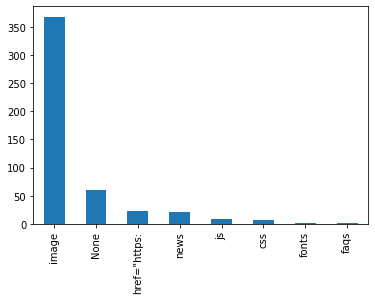

In [48]:
df['segment'].value_counts().plot.bar()
